In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


In [2]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [3]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [4]:
# Set paths
train_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [7]:
from tensorflow.keras import layers, models, regularizers

def create_cnn_model_with_multiple_fc_layers(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer 1 with ReLU Activation and L2 Regularization
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2 with ReLU Activation and L2 Regularization
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 3 with ReLU Activation and L2 Regularization
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_fc_layers = create_cnn_model_with_multiple_fc_layers(input_shape)

# Compile the model
model_fc_layers.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Model summary
model_fc_layers.summary()
history = model_fc_layers.fit(
    train_generator,
    epochs=30,  # Adjust based on your needs
    validation_data=test_generator
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 238, 238, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 119, 119, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 117, 117, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,931,012 (98.92 MB)

 Trainable params: 25,931,012 (98.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 482ms/step - accuracy: 0.3400 - loss: 1.4298 - val_accuracy: 0.4863 - val_loss: 1.3990
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 418ms/step - accuracy: 0.5329 - loss: 1.1346 - val_accuracy: 0.6709 - val_loss: 1.1216
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 420ms/step - accuracy: 0.6358 - loss: 1.0348 - val_accuracy: 0.5742 - val_loss: 1.2659
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 421ms/step - accuracy: 0.6948 - loss: 0.9082 - val_accuracy: 0.7313 - val_loss: 0.8415
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 421ms/step - accuracy: 0.7179 - loss: 0.8712 - val_accuracy: 0.6630 - val_loss: 1.0093
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 417ms/step - accuracy: 0.7332 - loss: 0.8651 - val_accuracy: 0.7416 - val_loss: 0.8096
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 422ms/step - accuracy: 0.7513 - loss: 0.8425 - val_accuracy: 0.7125 - val_loss: 0.8543
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.7655 - loss: 0.8123 - val

In [11]:
# Evaluate on test data
test_loss, test_acc = model_fc_layers.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the probabilities for test data
y_pred = model_fc_layers.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# AUC Score
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(f'AUC Score: {auc:.4f}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7136 - loss: 0.8599
Test Accuracy: 0.8201
Test Loss: 0.7035
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.65      0.78       262
  meningioma       0.66      0.60      0.63       306
     notumor       0.80      1.00      0.88       405
   pituitary       0.92      0.96      0.94       300

    accuracy                           0.82      1273
   macro avg       0.84      0.80      0.81      1273
weighted avg       0.83      0.82      0.81      1273

AUC Score: 0.9658


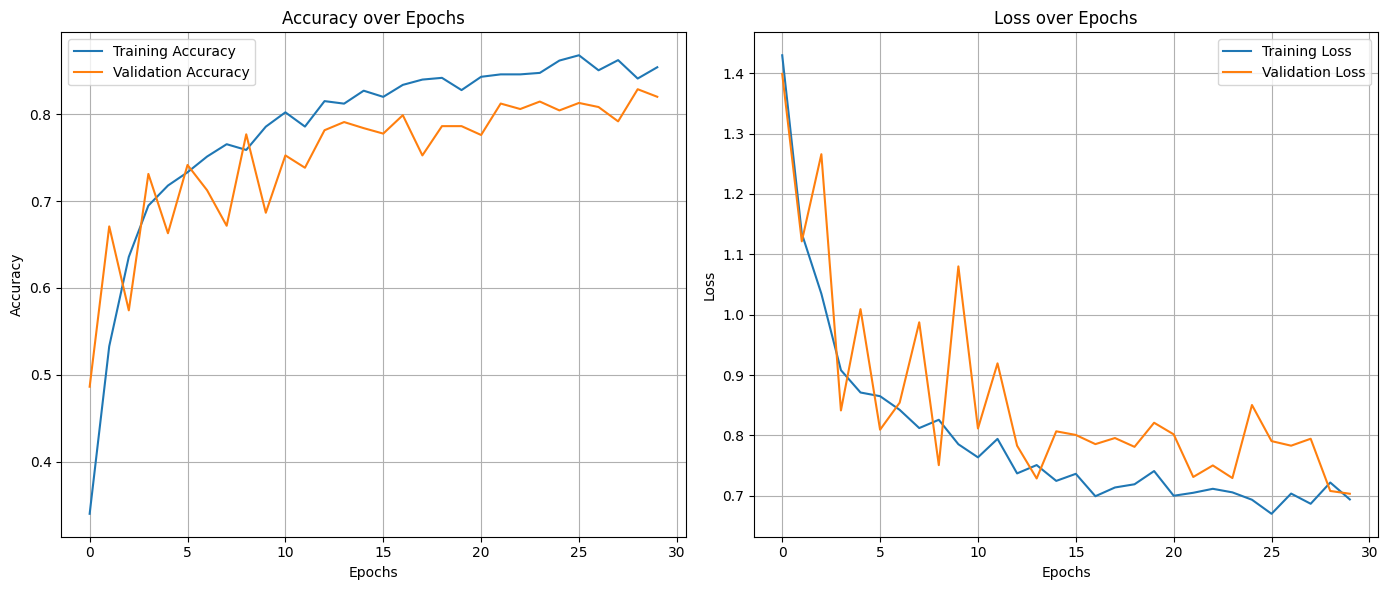

In [10]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()
# Replace these with your actual history values if stored differently
history = {
    'accuracy': [0.3400, 0.5329, 0.6358, 0.6948, 0.7179, 0.7332, 0.7513, 0.7655, 0.7589, 0.7857, 0.8022, 0.7858, 0.8151, 0.8122, 0.8271, 0.8200, 0.8338, 0.8399, 0.8419, 0.8278, 0.8431, 0.8459, 0.8459, 0.8476, 0.8618, 0.8679, 0.8506, 0.8623, 0.8411, 0.8541],
    'val_accuracy': [0.4863, 0.6709, 0.5742, 0.7313, 0.6630, 0.7416, 0.7125, 0.6716, 0.7769, 0.6866, 0.7526, 0.7384, 0.7816, 0.7910, 0.7840, 0.7777, 0.7989, 0.7526, 0.7863, 0.7863, 0.7761, 0.8123, 0.8060, 0.8146, 0.8044, 0.8130, 0.8083, 0.7918, 0.8288, 0.8201],
    'loss': [1.4298, 1.1346, 1.0348, 0.9082, 0.8712, 0.8651, 0.8425, 0.8123, 0.8260, 0.7855, 0.7638, 0.7944, 0.7372, 0.7510, 0.7248, 0.7365, 0.6994, 0.7139, 0.7192, 0.7411, 0.7002, 0.7051, 0.7117, 0.7058, 0.6936, 0.6703, 0.7038, 0.6869, 0.7221, 0.6941],
    'val_loss': [1.3990, 1.1216, 1.2659, 0.8415, 1.0093, 0.8096, 0.8543, 0.9875, 0.7509, 1.0801, 0.8116, 0.9195, 0.7831, 0.7288, 0.8069, 0.8009, 0.7857, 0.7958, 0.7812, 0.8211, 0.8019, 0.7313, 0.7504, 0.7295, 0.8505, 0.7907, 0.7831, 0.7946, 0.7081, 0.7035]
}

# Plot accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
